In [8]:
import os 
import numpy as np
import healpy as hp
from astropy import units as u
from astropy.coordinates import SkyCoord

In [21]:
galaxymap_path ='/Users/kefang/Softwares/analysis_001/data/ancil/WISE_galaxymap.fits'
galaxymap = hp.fitsfunc.read_map(galaxymap_path, verbose=False)

In [6]:
NSIDE = 128
NPIXEL = hp.pixelfunc.nside2npix(NSIDE)
exposuremap_theta, exposuremap_phi = hp.pixelfunc.pix2ang(NSIDE, np.arange(NPIXEL))

In [10]:
c_icrs = SkyCoord(ra=(2 * np.pi - exposuremap_phi) * u.radian, dec=(np.pi/2 - exposuremap_theta)*u.radian, frame='icrs')

In [15]:
idx = np.where(np.abs(c_icrs.galactic.b.degree) < 10)

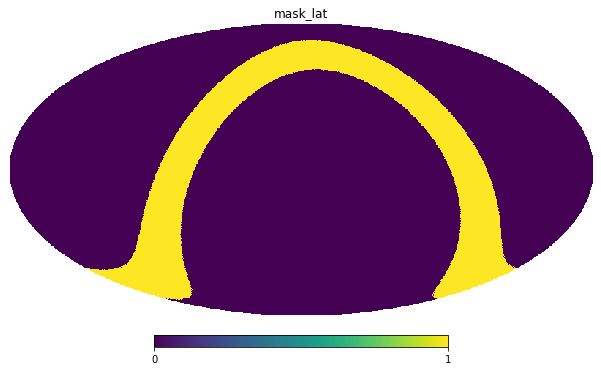

In [29]:
hpMask = hp.pixelfunc.ma(np.ones(NPIXEL))
mask_lat = np.zeros(NPIXEL, dtype=np.bool)

mask_lat[idx] = 1. 
np.where(mask_lat != 0)

hp.mollview(mask_lat, title="mask_lat")
hpMask.mask = mask_lat





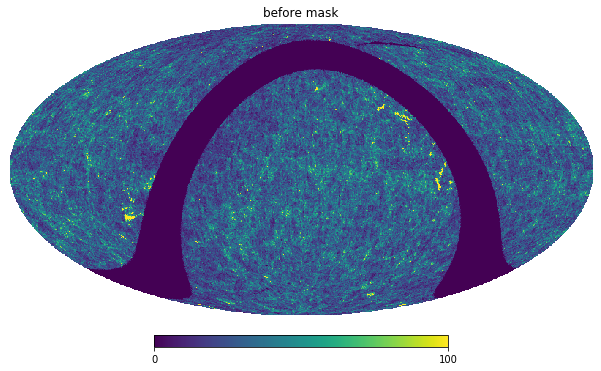

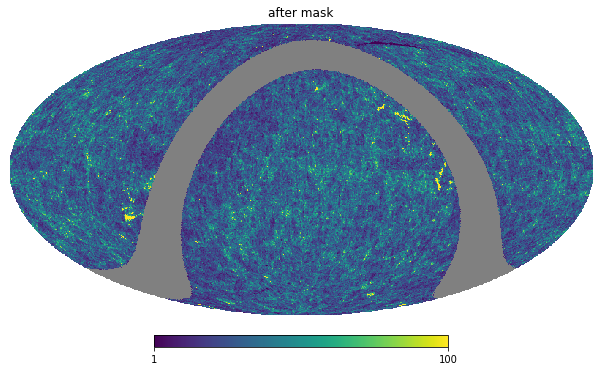

In [30]:
hp.mollview(galaxymap, title="before mask", max=100)
hp.mollview(galaxymap+hpMask, title="after mask", max=100)


